[7.375, 2.7916666666666665, 4.458333333333333, 10.5, 10.166666666666666, -8.5, -3.7916666666666665, 12.041666666666666]


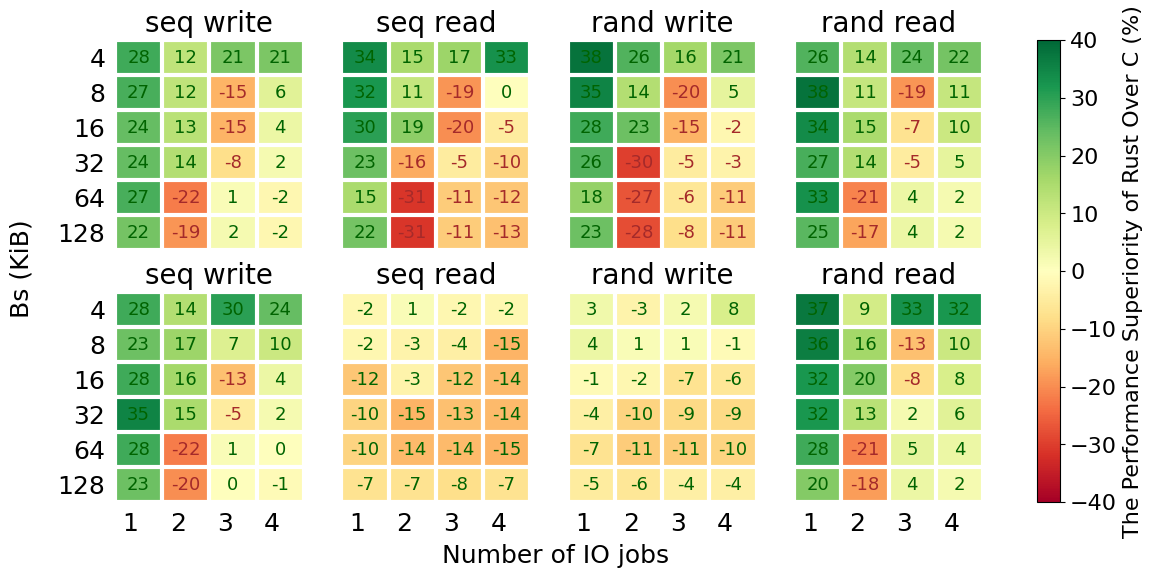

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl
from matplotlib import colors

np.random.seed(19680801)
data_sched = np.load("out_np_1_10.npy").T
data_none = np.load("out_np.npy").T
data = [data_sched, data_none]
sched = np.array([])
none = np.array([])
bs = [4,8,16,32,64,128]
# bs = bs[2:6]
jobs = [1,2,3,4]
data_index = [0,1,3,4]
avg = []
# title = np.array(['seq write', 'seq read', 'seq readwrite', 'rand write', 'rand read', 'rand readwrite']).reshape(2,3)
title = ['seq write', 'seq read', 'rand write', 'rand read']
label_font_conf = {
    # "weight": "bold",
    "size": "18"
}

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    # cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    # cbar.ax.set_ylabel(cbarlabel, va="bottom")
    cbar = None

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels, **label_font_conf)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels, **label_font_conf)

    # Let the horizontal axes labeling appear on top.
    # ax.tick_params(top=True, bottom=False,
    #                labeltop=True, labelbottom=False)

    ax.tick_params(bottom=False, labelbottom=True, left=False, labelleft=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

fig, axs = plt.subplots(2,4,figsize=(14,6),dpi=100)
jobs_y = 0
fig.supylabel("Bs (KiB)", x=0.05, y=jobs_y+0.5, **label_font_conf)
fig.supxlabel("Number of IO jobs", x=0.44, y=jobs_y, **label_font_conf)

images = []
for i in range(2):
    for j in range(4):
        matrix = data[i][data_index[j]].reshape(6,6)[:, :4]
        # matrix = data[i][data_index[j]].reshape(6,6)[2:6, :4]
        # if i == 0:
        #     if sched.shape[0] == 0:
        #         sched = matrix
        #     else:
        #         sched = np.concatenate((sched, matrix), axis=1)
        # else:
        #     if none.shape[0] == 0:
        #         none = matrix
        #     else:
        #         none = np.concatenate((none, matrix), axis=1)
        avg.append(np.mean(matrix))
        im, cbar = heatmap(matrix, bs, jobs, ax=axs[i,j], cmap="RdYlGn", aspect='auto', vmin=-40, vmax=40)
        images.append(im)
        texts = annotate_heatmap(im, valfmt="{x:.0f}", fontsize=13, textcolors=("#A52A2A", "darkgreen"))
        axs[i, j].label_outer()
        axs[i, j].set_title(title[j], fontsize=20)
# avg_sched = np.mean(sched)
# avg_none = np.mean(none)
# print(f'avg_sched: {avg_sched}, avg_none: {avg_none}')
print(avg)

# 自适应创建colorbar的范围
# vmin = min(image.get_array().min() for image in images)
# vmax = max(image.get_array().max() for image in images)
# norm = colors.Normalize(vmin=vmin, vmax=vmax)
# for im in images:
#     im.set_norm(norm)

cbar = fig.colorbar(images[0], ax=axs, pad=0.05)
cbar.ax.tick_params(labelsize=16)
cbar.set_label("The Performance Superiority of Rust Over C (%)", size=16)
plt.savefig("./figure5.pdf", bbox_inches="tight")

6
5
12
11
9
12
42
56
45
48
55
10
9
5
40
18
42
28
34
15
21
13
33
27
21
17
3
8
6
13
10
7
2
4
5
2
5
2
1
1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[6, 5, 12, 11, 9, 12, 42, 56, 45, 48, 55, 10, 9, 5, 40, 18, 42, 28, 34, 15, 21, 13, 33, 27, 21, 17, 3, 8, 6, 13, 10, 7, 2, 4, 5, 2, 5, 2, 1, 1]


Text(0, 0.5, 'Email Count')

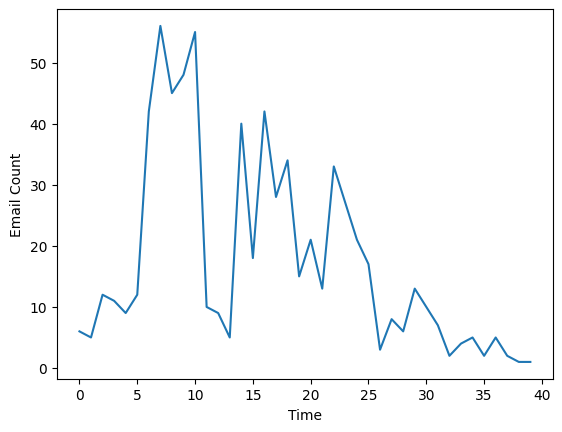

In [3]:
import json
jsonfile  = '''{
    "params": {
        "repoId": "207181317"
    },
    "requestedAt": "2024-01-14T15:45:07.531+00:00",
    "finishedAt": "2024-01-14T15:45:07.564+00:00",
    "spent": 0.033,
    "sql": "",
    "fields": [
        {
            "name": "event_month",
            "columnType": 253
        },
        {
            "name": "xs",
            "columnType": 246
        },
        {
            "name": "s",
            "columnType": 246
        },
        {
            "name": "m",
            "columnType": 246
        },
        {
            "name": "l",
            "columnType": 246
        },
        {
            "name": "xl",
            "columnType": 246
        },
        {
            "name": "xxl",
            "columnType": 246
        },
        {
            "name": "all_size",
            "columnType": 8
        }
    ],
    "data": [
        {
            "event_month": "2020-09-01",
            "xs": 2,
            "s": 2,
            "m": 1,
            "l": 0,
            "xl": 1,
            "xxl": 0,
            "all_size": 6
        },
        {
            "event_month": "2020-10-01",
            "xs": 0,
            "s": 0,
            "m": 3,
            "l": 0,
            "xl": 0,
            "xxl": 2,
            "all_size": 5
        },
        {
            "event_month": "2020-11-01",
            "xs": 5,
            "s": 1,
            "m": 3,
            "l": 1,
            "xl": 1,
            "xxl": 1,
            "all_size": 12
        },
        {
            "event_month": "2020-12-01",
            "xs": 3,
            "s": 3,
            "m": 1,
            "l": 2,
            "xl": 0,
            "xxl": 2,
            "all_size": 11
        },
        {
            "event_month": "2021-01-01",
            "xs": 0,
            "s": 4,
            "m": 1,
            "l": 2,
            "xl": 0,
            "xxl": 2,
            "all_size": 9
        },
        {
            "event_month": "2021-02-01",
            "xs": 3,
            "s": 1,
            "m": 1,
            "l": 5,
            "xl": 1,
            "xxl": 1,
            "all_size": 12
        },
        {
            "event_month": "2021-03-01",
            "xs": 12,
            "s": 8,
            "m": 5,
            "l": 9,
            "xl": 3,
            "xxl": 5,
            "all_size": 42
        },
        {
            "event_month": "2021-04-01",
            "xs": 14,
            "s": 14,
            "m": 10,
            "l": 13,
            "xl": 2,
            "xxl": 3,
            "all_size": 56
        },
        {
            "event_month": "2021-05-01",
            "xs": 9,
            "s": 7,
            "m": 12,
            "l": 13,
            "xl": 2,
            "xxl": 2,
            "all_size": 45
        },
        {
            "event_month": "2021-06-01",
            "xs": 7,
            "s": 13,
            "m": 9,
            "l": 14,
            "xl": 3,
            "xxl": 2,
            "all_size": 48
        },
        {
            "event_month": "2021-07-01",
            "xs": 14,
            "s": 9,
            "m": 13,
            "l": 11,
            "xl": 3,
            "xxl": 5,
            "all_size": 55
        },
        {
            "event_month": "2021-08-01",
            "xs": 4,
            "s": 3,
            "m": 1,
            "l": 2,
            "xl": 0,
            "xxl": 0,
            "all_size": 10
        },
        {
            "event_month": "2021-09-01",
            "xs": 4,
            "s": 3,
            "m": 0,
            "l": 1,
            "xl": 0,
            "xxl": 1,
            "all_size": 9
        },
        {
            "event_month": "2021-10-01",
            "xs": 2,
            "s": 2,
            "m": 0,
            "l": 0,
            "xl": 0,
            "xxl": 1,
            "all_size": 5
        },
        {
            "event_month": "2021-11-01",
            "xs": 2,
            "s": 4,
            "m": 13,
            "l": 14,
            "xl": 2,
            "xxl": 5,
            "all_size": 40
        },
        {
            "event_month": "2021-12-01",
            "xs": 8,
            "s": 6,
            "m": 2,
            "l": 2,
            "xl": 0,
            "xxl": 0,
            "all_size": 18
        },
        {
            "event_month": "2022-01-01",
            "xs": 9,
            "s": 4,
            "m": 12,
            "l": 12,
            "xl": 0,
            "xxl": 5,
            "all_size": 42
        },
        {
            "event_month": "2022-02-01",
            "xs": 7,
            "s": 4,
            "m": 6,
            "l": 7,
            "xl": 1,
            "xxl": 3,
            "all_size": 28
        },
        {
            "event_month": "2022-03-01",
            "xs": 7,
            "s": 5,
            "m": 6,
            "l": 11,
            "xl": 2,
            "xxl": 3,
            "all_size": 34
        },
        {
            "event_month": "2022-04-01",
            "xs": 4,
            "s": 1,
            "m": 1,
            "l": 4,
            "xl": 4,
            "xxl": 1,
            "all_size": 15
        },
        {
            "event_month": "2022-05-01",
            "xs": 7,
            "s": 2,
            "m": 4,
            "l": 5,
            "xl": 1,
            "xxl": 2,
            "all_size": 21
        },
        {
            "event_month": "2022-06-01",
            "xs": 2,
            "s": 0,
            "m": 2,
            "l": 5,
            "xl": 3,
            "xxl": 1,
            "all_size": 13
        },
        {
            "event_month": "2022-07-01",
            "xs": 9,
            "s": 5,
            "m": 11,
            "l": 5,
            "xl": 1,
            "xxl": 2,
            "all_size": 33
        },
        {
            "event_month": "2022-08-01",
            "xs": 11,
            "s": 6,
            "m": 3,
            "l": 6,
            "xl": 0,
            "xxl": 1,
            "all_size": 27
        },
        {
            "event_month": "2022-09-01",
            "xs": 10,
            "s": 4,
            "m": 0,
            "l": 4,
            "xl": 1,
            "xxl": 2,
            "all_size": 21
        },
        {
            "event_month": "2022-10-01",
            "xs": 4,
            "s": 3,
            "m": 5,
            "l": 2,
            "xl": 0,
            "xxl": 3,
            "all_size": 17
        },
        {
            "event_month": "2022-11-01",
            "xs": 1,
            "s": 1,
            "m": 0,
            "l": 1,
            "xl": 0,
            "xxl": 0,
            "all_size": 3
        },
        {
            "event_month": "2022-12-01",
            "xs": 1,
            "s": 1,
            "m": 3,
            "l": 2,
            "xl": 0,
            "xxl": 1,
            "all_size": 8
        },
        {
            "event_month": "2023-01-01",
            "xs": 2,
            "s": 0,
            "m": 1,
            "l": 2,
            "xl": 1,
            "xxl": 0,
            "all_size": 6
        },
        {
            "event_month": "2023-02-01",
            "xs": 4,
            "s": 1,
            "m": 2,
            "l": 3,
            "xl": 1,
            "xxl": 2,
            "all_size": 13
        },
        {
            "event_month": "2023-03-01",
            "xs": 1,
            "s": 1,
            "m": 0,
            "l": 2,
            "xl": 0,
            "xxl": 6,
            "all_size": 10
        },
        {
            "event_month": "2023-04-01",
            "xs": 0,
            "s": 0,
            "m": 0,
            "l": 2,
            "xl": 0,
            "xxl": 5,
            "all_size": 7
        },
        {
            "event_month": "2023-05-01",
            "xs": 1,
            "s": 0,
            "m": 0,
            "l": 0,
            "xl": 0,
            "xxl": 1,
            "all_size": 2
        },
        {
            "event_month": "2023-06-01",
            "xs": 0,
            "s": 0,
            "m": 0,
            "l": 2,
            "xl": 1,
            "xxl": 1,
            "all_size": 4
        },
        {
            "event_month": "2023-07-01",
            "xs": 0,
            "s": 1,
            "m": 1,
            "l": 3,
            "xl": 0,
            "xxl": 0,
            "all_size": 5
        },
        {
            "event_month": "2023-08-01",
            "xs": 1,
            "s": 0,
            "m": 1,
            "l": 0,
            "xl": 0,
            "xxl": 0,
            "all_size": 2
        },
        {
            "event_month": "2023-09-01",
            "xs": 1,
            "s": 0,
            "m": 1,
            "l": 2,
            "xl": 0,
            "xxl": 1,
            "all_size": 5
        },
        {
            "event_month": "2023-11-01",
            "xs": 0,
            "s": 0,
            "m": 0,
            "l": 0,
            "xl": 0,
            "xxl": 2,
            "all_size": 2
        },
        {
            "event_month": "2023-12-01",
            "xs": 0,
            "s": 1,
            "m": 0,
            "l": 0,
            "xl": 0,
            "xxl": 0,
            "all_size": 1
        },
        {
            "event_month": "2024-01-01",
            "xs": 0,
            "s": 1,
            "m": 0,
            "l": 0,
            "xl": 0,
            "xxl": 0,
            "all_size": 1
        }
    ],
    "expiresAt": "2024-01-15T15:45:07.564+00:00",
    "refresh": true
}'''

a = json.loads(jsonfile)
num = []
for i in a["data"]:
    print(i["all_size"])
    num.append(i["all_size"])

import matplotlib.pylab as plt

x = [i for i in range(len(num))]
print(x)
# plt.plot(x[:25], num[:25])
plt.plot(x, num)
print(num)
plt.xlabel("Time")
plt.ylabel("Email Count")
# plt.imshow()

[numpy.datetime64('2020-09-01'), numpy.datetime64('2020-10-01'), numpy.datetime64('2020-11-01'), numpy.datetime64('2020-12-01'), numpy.datetime64('2021-01-01'), numpy.datetime64('2021-02-01'), numpy.datetime64('2021-03-01'), numpy.datetime64('2021-04-01'), numpy.datetime64('2021-05-01'), numpy.datetime64('2021-06-01'), numpy.datetime64('2021-07-01'), numpy.datetime64('2021-08-01'), numpy.datetime64('2021-09-01'), numpy.datetime64('2021-10-01'), numpy.datetime64('2021-11-01'), numpy.datetime64('2021-12-01'), numpy.datetime64('2022-01-01'), numpy.datetime64('2022-02-01'), numpy.datetime64('2022-03-01'), numpy.datetime64('2022-04-01'), numpy.datetime64('2022-05-01'), numpy.datetime64('2022-06-01'), numpy.datetime64('2022-07-01'), numpy.datetime64('2022-08-01'), numpy.datetime64('2022-09-01'), numpy.datetime64('2022-10-01'), numpy.datetime64('2022-11-01'), numpy.datetime64('2023-01-01'), numpy.datetime64('2023-02-01'), numpy.datetime64('2023-03-01'), numpy.datetime64('2023-04-01'), numpy.d

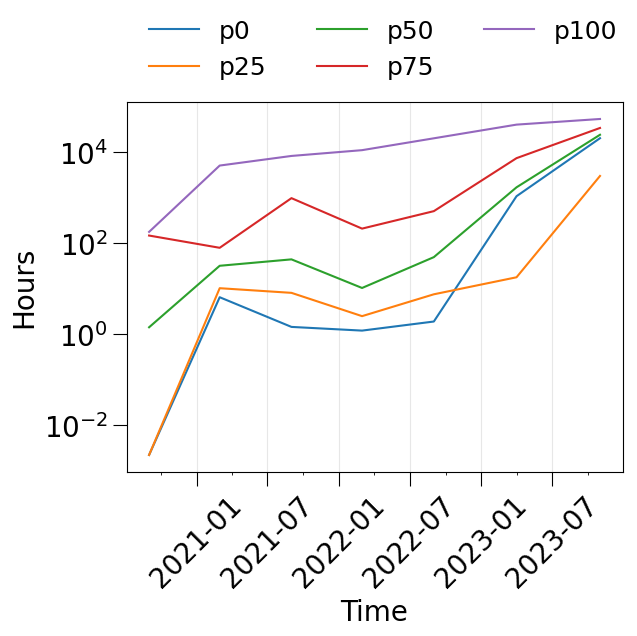

In [102]:
import json
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

jsonfile  = '''{
    "params": {
        "repoId": "207181317"
    },
    "requestedAt": "2024-01-10T08:09:41.266+00:00",
    "finishedAt": "2024-01-10T08:09:41.288+00:00",
    "spent": 0.022,
    "sql": "123",
    "fields": [
        {
            "name": "event_month",
            "columnType": 253
        },
        {
            "name": "p0",
            "columnType": 246
        },
        {
            "name": "p25",
            "columnType": 246
        },
        {
            "name": "p50",
            "columnType": 246
        },
        {
            "name": "p75",
            "columnType": 246
        },
        {
            "name": "p100",
            "columnType": 246
        }
    ],
    "data": [
        {
            "event_month": "2020-09-01",
            "p0": 0.00222222,
            "p25": 0.00222222,
            "p50": 1.41888889,
            "p75": 146.83416667,
            "p100": 176.67694444
        },
        {
            "event_month": "2020-10-01",
            "p0": 5.66777778,
            "p25": 5.66777778,
            "p50": 13.70833333,
            "p75": 13.70833333,
            "p100": 26.18111111
        },
        {
            "event_month": "2020-11-01",
            "p0": 0.07972222,
            "p25": 0.16138889,
            "p50": 1.39055556,
            "p75": 10.25166667,
            "p100": 1668.51916667
        },
        {
            "event_month": "2020-12-01",
            "p0": 0.02083333,
            "p25": 0.14027778,
            "p50": 0.44638889,
            "p75": 5.91444444,
            "p100": 47.61694444
        },
        {
            "event_month": "2021-01-01",
            "p0": 0.5075,
            "p25": 2.24916667,
            "p50": 8.71777778,
            "p75": 39.87555556,
            "p100": 3000.24638889
        },
        {
            "event_month": "2021-02-01",
            "p0": 0.20944444,
            "p25": 2.02138889,
            "p50": 7.56138889,
            "p75": 9.26833333,
            "p100": 317.82277778
        },
        {
            "event_month": "2021-03-01",
            "p0": 0.03027778,
            "p25": 0.29166667,
            "p50": 1.535,
            "p75": 72.71694444,
            "p100": 4030.15583333
        },
        {
            "event_month": "2021-04-01",
            "p0": 0.08416667,
            "p25": 0.41,
            "p50": 4.47277778,
            "p75": 38.32027778,
            "p100": 657.4775
        },
        {
            "event_month": "2021-05-01",
            "p0": 0.04527778,
            "p25": 1.05166667,
            "p50": 6.36805556,
            "p75": 93.96777778,
            "p100": 274.18222222
        },
        {
            "event_month": "2021-06-01",
            "p0": 0.0025,
            "p25": 1.77972222,
            "p50": 10.12972222,
            "p75": 37.43638889,
            "p100": 387.40361111
        },
        {
            "event_month": "2021-07-01",
            "p0": 0.03333333,
            "p25": 0.39027778,
            "p50": 0.8725,
            "p75": 48.99277778,
            "p100": 1966.81916667
        },
        {
            "event_month": "2021-08-01",
            "p0": 1.24972222,
            "p25": 4.16916667,
            "p50": 20.63833333,
            "p75": 682.09111111,
            "p100": 913.93805556
        },
        {
            "event_month": "2021-09-01",
            "p0": 0.00472222,
            "p25": 0.02833333,
            "p50": 0.53055556,
            "p75": 15.91861111,
            "p100": 29.91972222
        },
        {
            "event_month": "2021-10-01",
            "p0": 0.00416667,
            "p25": 0.37333333,
            "p50": 1.19805556,
            "p75": 54.2825,
            "p100": 1227.34527778
        },
        {
            "event_month": "2021-11-01",
            "p0": 0.35472222,
            "p25": 0.59166667,
            "p50": 5.26972222,
            "p75": 85.05972222,
            "p100": 2995.39833333
        },
        {
            "event_month": "2021-12-01",
            "p0": 0.30694444,
            "p25": 0.44888889,
            "p50": 0.62666667,
            "p75": 2.13638889,
            "p100": 56.31055556
        },
        {
            "event_month": "2022-01-01",
            "p0": 0.15055556,
            "p25": 0.5475,
            "p50": 1.80333333,
            "p75": 24.60444444,
            "p100": 838.665
        },
        {
            "event_month": "2022-02-01",
            "p0": 0.37805556,
            "p25": 0.50166667,
            "p50": 0.92944444,
            "p75": 26.49916667,
            "p100": 5877.16555556
        },
        {
            "event_month": "2022-03-01",
            "p0": 0.40138889,
            "p25": 0.83916667,
            "p50": 10.33111111,
            "p75": 141.59611111,
            "p100": 7619.47416667
        },
        {
            "event_month": "2022-04-01",
            "p0": 0.44944444,
            "p25": 0.64361111,
            "p50": 8.85611111,
            "p75": 157.75777778,
            "p100": 460.45305556
        },
        {
            "event_month": "2022-05-01",
            "p0": 0.0975,
            "p25": 0.49861111,
            "p50": 3.33972222,
            "p75": 48.47694444,
            "p100": 2039.28972222
        },
        {
            "event_month": "2022-06-01",
            "p0": 0.52444444,
            "p25": 0.90944444,
            "p50": 8.98333333,
            "p75": 35.04222222,
            "p100": 309.12305556
        },
        {
            "event_month": "2022-07-01",
            "p0": 0.01916667,
            "p25": 4.16694444,
            "p50": 17.28194444,
            "p75": 120.03305556,
            "p100": 9653.49861111
        },
        {
            "event_month": "2022-08-01",
            "p0": 0.40555556,
            "p25": 0.46388889,
            "p50": 0.47388889,
            "p75": 1.48055556,
            "p100": 4.03
        },
        {
            "event_month": "2022-09-01",
            "p0": 1.00944444,
            "p25": 1.42361111,
            "p50": 3.55805556,
            "p75": 1032.71583333,
            "p100": 4392.51027778
        },
        {
            "event_month": "2022-10-01",
            "p0": 0.06166667,
            "p25": 0.53305556,
            "p50": 5.35305556,
            "p75": 95.74944444,
            "p100": 12070.6375
        },
        {
            "event_month": "2022-11-01",
            "p0": 1063.17527778,
            "p25": null,
            "p50": 1063.17527778,
            "p75": 1063.17527778,
            "p100": 1063.17527778
        },
        {
            "event_month": "2023-01-01",
            "p0": 0.15944444,
            "p25": 0.3125,
            "p50": 399.7675,
            "p75": 3619.45611111,
            "p100": 13863.58194444
        },
        {
            "event_month": "2023-02-01",
            "p0": 9.37722222,
            "p25": 14.44861111,
            "p50": 18.66888889,
            "p75": 18.83222222,
            "p100": 3694.30833333
        },
        {
            "event_month": "2023-03-01",
            "p0": 0.01805556,
            "p25": 1.07361111,
            "p50": 192.99722222,
            "p75": 1529.00388889,
            "p100": 5039.46305556
        },
        {
            "event_month": "2023-04-01",
            "p0": 0.64722222,
            "p25": 0.64722222,
            "p50": 86.945,
            "p75": 95.64138889,
            "p100": 4837.55444444
        },
        {
            "event_month": "2023-06-01",
            "p0": 0.36694444,
            "p25": 0.36694444,
            "p50": 0.36694444,
            "p75": 6013.82472222,
            "p100": 6013.82472222
        },
        {
            "event_month": "2023-07-01",
            "p0": 0.33388889,
            "p25": 0.33388889,
            "p50": 12.85777778,
            "p75": 12.85777778,
            "p100": 55.07444444
        },
        {
            "event_month": "2023-08-01",
            "p0": 23.50138889,
            "p25": 2987.46277778,
            "p50": 3096.65027778,
            "p75": 6939.05861111,
            "p100": 13925.02611111
        },
        {
            "event_month": "2023-09-01",
            "p0": 1.00472222,
            "p25": 1.00472222,
            "p50": 646.23555556,
            "p75": 646.23555556,
            "p100": 8367.59194444
        },
        {
            "event_month": "2023-11-01",
            "p0": 20165.04888889,
            "p25": null,
            "p50": 20165.04888889,
            "p75": 20165.04888889,
            "p100": 20165.04888889
        }
    ],
    "expiresAt": "2024-01-11T08:09:41.288+00:00",
    "refresh": true
}'''

label_conf = dict(size=20)
a = json.loads(jsonfile)
num = [[],[],[],[],[]]
time = []
labels = [f'p{25*j}' for j in range(5)]
for i in a["data"]:
    for j in range(5):
        num[j].append(i[labels[j]])
    time.append(np.datetime64(i["event_month"]))
# time_pretty = np.arange(np.datetime64('2020-09'), np.datetime64('2024-01'), np.timedelta64(6, 'M'))
num = np.array(num)
num_df = pd.DataFrame(num)
num_df = num_df.fillna(0)
# print(num_df)
# time_panda = pd.date_range('20200901','20231101', freq='6m').to_list()
# print(time_panda)
# print(time_pretty)
print(time)
new_time = []
for i in range(6):
    new_time.append(time[i*6])
new_time.append(time[-1])
new_num_df = pd.DataFrame()
new_num_df[0] = num_df.iloc[:,0]
new_num_df[1] = num_df.iloc[:,1:6].sum(axis=1)
# new_num_df[2] = num_df.iloc[:,6:12].sum(axis=1)
# new_num_df[3] = num_df.iloc[:,12:18].sum(axis=1)
# new_num_df[4] = num_df.iloc[:,18:24].sum(axis=1)
# new_num_df[5] = num_df.iloc[:,24:31].sum(axis=1)
# new_num_df[6] = num_df.iloc[:,31:36].sum(axis=1)
for i in range(2,7):
    print(6+6*(i-2), 6+6*(i-2) + 6)
    print(time[6+6*(i-2)])
    new_num_df[i] = num_df.iloc[:,6+6*(i-2):6+6*(i-2) + 6].sum(axis=1)
print(new_num_df)
print(new_time)
print(len(new_time))
# print(num.cumsum(axis=1))

x = [i for i in range(len(num))]
# y = [i for i in range(len(time))]
# plt.plot(x[:25], num[:25])
# plt.plot(x, num)
fig, ax = plt.subplots(dpi=100)
plt.yscale("log")
for i in range(5):
    # ax.plot(time_pretty, data[i].values(), label=labels[i])
    # ax.plot(time, num_df.loc[i], label=labels[i])
    ax.plot(new_time, new_num_df.iloc[i], label=labels[i])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.tick_params(labelsize=20, size=10)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel("Time", **label_conf)
ax.set_ylabel("Hours", **label_conf)
ax.grid(axis='x', alpha=0.3)
ax.legend(ncol=3, frameon=False, bbox_to_anchor=(0,1), loc='lower left',fontsize=18)
# plt.imshow()